#### 네이버 금융 뉴스의 주요 뉴스에서 크롤링을 통해 수집한 뉴스 기사 제목을 정리해야 함. 
- 월별 뉴스 기사 수 추이 시각화
- 주요 단어 추출
- 월별 주요 단어 출현 빈도 시각화

### Step 1. 월별 뉴스 기사 수 추이 시각화

In [1]:
import os
import pandas as pd
import numpy as np
os.chdir(r"C:\Users\user\jupyter\python\mini_project\뉴스 기사 정리하기")

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] =(10,7)

In [2]:
df = pd.read_csv('금융기사목록.csv', engine = 'python')

In [3]:
df.head()

,기사제목,신문사,작성일자
0,휴장일 슬쩍올빼미 공시 주의보,서울경제,2018-01-01
1,코스피 상단 28003100,서울경제,2018-01-01
2,한숨 동부대우전자 중동,서울경제,2018-01-01
3,금융투자업계 지도 생존 성장 운용자문사 대주주교체 카드 꺼내든다,파이낸셜뉴스,2018-01-01
4,금융투자업계 지도 모험자본 확충 원년 초대형 질주 계속,파이낸셜뉴스,2018-01-01


In [8]:
df['월'] = df['작성일자'].str.split('-', expand = True).iloc[:, 1]
grouped_df = df.groupby('월', as_index = False)['작성일자'].count()
grouped_df


,월,작성일자
0,01,522
1,02,465
2,03,499
3,04,539
4,05,527
5,06,528
6,07,563
7,08,548
8,09,548
9,10,550


<BarContainer object of 12 artists>

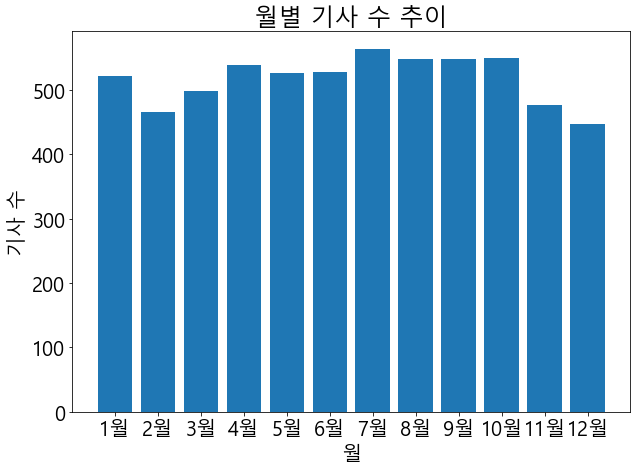

In [12]:
plt.title('월별 기사 수 추이')
plt.xlabel('월')
plt.ylabel('기사 수')


plt.xticks(range(12), [str(i+1)+'월' for i in range(12)])
# plt.ylim(min(grouped_df['작성일자'])*0.9,  # 자주 사용하는 패턴이다. 
#         max(grouped_df['작성일자'])*1.1)   ## 작성 일자를 통해 count 했기 때문에 불편하면 column 바꾸면 된다. rename인가. 
plt.bar(grouped_df['월'], grouped_df['작성일자'] )


# 그래프 결과가 월별로 그렇게 차이가 커보이지 않는다. 차이를 커 보이게 시각화하기 위해서는 y축의 범위를 설정해야 한다. 추이 비교를 보기 위해서. 

#### Step2. 주요 단어 추출

In [13]:
df['기사제목']

0                                  휴장일 슬쩍올빼미 공시 주의보
1                                   코스피 상단 28003100
2                                      한숨 동부대우전자 중동
3               금융투자업계 지도 생존 성장 운용자문사 대주주교체 카드 꺼내든다
4                    금융투자업계 지도 모험자본 확충 원년 초대형 질주 계속
                           ...                     
6208              은행장 전망 내년 우리경제 25 성장한미 기준금리차 확대 듯
6209                   은행장 전망 최대 이슈 리스크 관리주담대 감소 전망
6210                               수익성 구멍 인터넷주 강 존버
6211                           삼성證 변동성 내년 증시 글로벌 공략
6212    마켓인사이트경기하강 국면인프라 투 옥석 英자산운용사 인프라레드 폰 기오노 대표
Name: 기사제목, Length: 6213, dtype: object

In [14]:
df['기사제목'].str.split(' ', expand = False)
# 각각의 제목을 자른 뒤에 리스트에 넣어주었다. 
word_list = df['기사제목'].str.split(' ', expand = False).sum()    # 모든 리스트를 하나의 리스트로 합쳐주었다. 

word_list = pd.Series(word_list)
major_words = word_list.value_counts().iloc[:10]  # 가장 많이 출현한 단어들 상위 10개 추리기. >>>>>>>>>>>>>>>>> 근데 기타 단어들이 너무 많다. 그래서 조금 기준을 완화시켰다. 

major_words = word_list.value_counts().loc[word_list.value_counts().values >= 100]
# word_list.value_counts().values


In [27]:
other_words = word_list.value_counts().iloc[25:].sum()
major_words['기타'] = other_words
major_words
len(word_list)
# 25/len(word_list)

33754

([<matplotlib.patches.Wedge at 0x179e130c250>,
 [Text(-1.0481950022147206, 0.5841979436219215, '기타'),
  Text(1.048195029562999, -0.5841978945523716, '주요단어')],
 [Text(-0.5240975011073603, 0.29209897181096073, '83.8%'),
  Text(0.5240975147814995, -0.2920989472761858, '16.2%')])

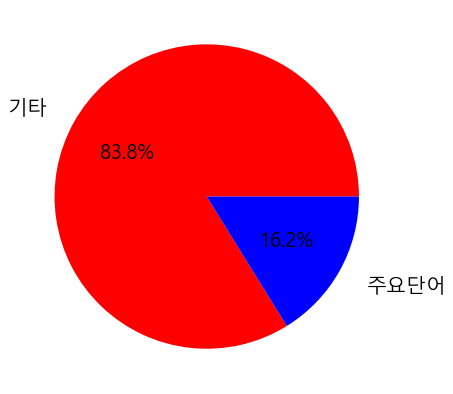

In [25]:
## 주요 단어, 기타 단어 비율 시각과
plt.pie(x = [major_words['기타'], major_words.iloc[:-1].sum()],
       labels = ['기타', '주요단어'],
       colors = ['red', 'blue'], 
       labeldistance = 1.2,
       autopct = '%1.1f%%')

In [17]:
major_words_without_words =  major_words.drop('기타')

In [18]:
major_words_without_words

코스피     815
증시      745
상승      390
하락      350
코스닥     252
美       224
우려      215
마켓뷰     205
오전시황    190
환율      184
주목      176
반등      174
무역전쟁    150
실적      150
미중      136
회복      128
외국      122
마감      119
금리      110
주       109
강세      108
만       105
급락      104
투       102
등       100
dtype: int64

In [19]:
df['기사제목'].str.contains('마감')

0       False
1       False
2       False
3       False
4       False
        ...  
6208    False
6209    False
6210    False
6211    False
6212    False
Name: 기사제목, Length: 6213, dtype: bool

In [20]:
new_cols = []
for col in major_words_without_words.index:
    df[col + '_등장횟수'] = df['기사제목'].str.contains(col)  # 새로운 컬럼추가
    new_cols.append(col + '_등장횟수')
df.head()



# 텍스트 분석: sparse한 데이터를 처리하기 위해서는? for문 잘 사용안하고 문서 행렬을 만드는 함수를 사용해야 한다. sklearn.countvectorizer -> 단어 문서 행렬을 

,기사제목,신문사,작성일자,월,코스피_등장횟수,증시_등장횟수,상승_등장횟수,하락_등장횟수,코스닥_등장횟수,美_등장횟수,...,회복_등장횟수,외국_등장횟수,마감_등장횟수,금리_등장횟수,주_등장횟수,강세_등장횟수,만_등장횟수,급락_등장횟수,투_등장횟수,등_등장횟수
0,휴장일 슬쩍올빼미 공시 주의보,서울경제,2018-01-01,01,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,코스피 상단 28003100,서울경제,2018-01-01,01,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,한숨 동부대우전자 중동,서울경제,2018-01-01,01,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,금융투자업계 지도 생존 성장 운용자문사 대주주교체 카드 꺼내든다,파이낸셜뉴스,2018-01-01,01,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,금융투자업계 지도 모험자본 확충 원년 초대형 질주 계속,파이낸셜뉴스,2018-01-01,01,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [21]:
grouped_df = df.groupby(['월'])[new_cols].sum()
grouped_df

,코스피_등장횟수,증시_등장횟수,상승_등장횟수,하락_등장횟수,코스닥_등장횟수,美_등장횟수,우려_등장횟수,마켓뷰_등장횟수,오전시황_등장횟수,환율_등장횟수,...,회복_등장횟수,외국_등장횟수,마감_등장횟수,금리_등장횟수,주_등장횟수,강세_등장횟수,만_등장횟수,급락_등장횟수,투_등장횟수,등_등장횟수
월,,,,,,,,,,,,,,,,,,,,,
01,112,81,67,43,154,29,6,20,19,34,...,16,27,85,28,97,18,46,7,33,27
02,100,136,74,38,50,72,16,18,14,22,...,25,27,69,71,105,11,33,25,27,46
03,138,104,48,43,38,90,54,23,20,16,...,22,30,82,50,128,13,27,11,30,44
04,152,106,68,55,48,61,25,13,22,30,...,22,32,91,41,148,21,34,13,24,53
05,106,113,62,67,38,35,22,12,13,19,...,12,36,94,33,163,30,35,17,22,67
06,80,154,54,54,19,40,23,17,5,25,...,6,21,111,32,148,23,34,5,29,63
07,90,126,52,49,54,42,24,20,16,30,...,19,24,88,25,154,11,25,16,33,54
08,96,113,47,35,24,51,15,22,22,24,...,20,11,78,27,114,5,24,13,50,65
09,65,97,35,37,30,59,25,16,13,13,...,10,28,67,33,175,8,20,5,39,57
